# Определение стоимости автомобилей

**Этапы проекта:**
 1. Обзор данных
 2. Предобработка данных
 3. Построение и анализ моделей машинного обучения
 4. Выводы

## Подготовка данных

### Открытие и изучение данных

In [1]:
# загрузим библиотеки для работы
import pandas as pd
import numpy as np

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from catboost import CatBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.dummy import DummyRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
import seaborn as sns

import time

In [2]:
# загрузим данные
data = pd.read_csv("/datasets/autos.csv")

In [3]:
# изучим структуру таблицы
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [4]:
# посмотрим 5 строк таблицы
data.head()

DateCrawled  Price VehicleType  RegistrationYear Gearbox  Power  \
0  2016-03-24 11:52:17    480         NaN              1993  manual      0   
1  2016-03-24 10:58:45  18300       coupe              2011  manual    190   
2  2016-03-14 12:52:21   9800         suv              2004    auto    163   
3  2016-03-17 16:54:04   1500       small              2001  manual     75   
4  2016-03-31 17:25:20   3600       small              2008  manual     69   

   Model  Kilometer  RegistrationMonth  FuelType       Brand NotRepaired  \
0   golf     150000                  0    petrol  volkswagen         NaN   
1    NaN     125000                  5  gasoline        audi         yes   
2  grand     125000                  8  gasoline        jeep         NaN   
3   golf     150000                  6    petrol  volkswagen          no   
4  fabia      90000                  7  gasoline       skoda          no   

           DateCreated  NumberOfPictures  PostalCode             LastSeen  
0  2016-03-24 00:00:00                 0       70435  2016-04-07 03:16:57  
1  2016-03-24 00:00:00                 0       66954  2016-04-07 01:46:50  
2  2016-03-14 00:00:00                 0       90480  2016-04-05 12:47:46  
3  2016-03-17 00:00:00                 0       91074  2016-03-17 17:40:17  
4  2016-03-31 00:00:00                 0       60437  2016-04-06 10:17:21

In [5]:
# посмотрим на статистические данные
data.describe(include='all')

DateCrawled          Price VehicleType  RegistrationYear  \
count                354369  354369.000000      316879     354369.000000   
unique               271174            NaN           8               NaN   
top     2016-03-24 14:49:47            NaN       sedan               NaN   
freq                      7            NaN       91457               NaN   
mean                    NaN    4416.656776         NaN       2004.234448   
std                     NaN    4514.158514         NaN         90.227958   
min                     NaN       0.000000         NaN       1000.000000   
25%                     NaN    1050.000000         NaN       1999.000000   
50%                     NaN    2700.000000         NaN       2003.000000   
75%                     NaN    6400.000000         NaN       2008.000000   
max                     NaN   20000.000000         NaN       9999.000000   

       Gearbox          Power   Model      Kilometer  RegistrationMonth  \
count   334536  354369.000000  334664  354369.000000      354369.000000   
unique       2            NaN     250            NaN                NaN   
top     manual            NaN    golf            NaN                NaN   
freq    268251            NaN   29232            NaN                NaN   
mean       NaN     110.094337     NaN  128211.172535           5.714645   
std        NaN     189.850405     NaN   37905.341530           3.726421   
min        NaN       0.000000     NaN    5000.000000           0.000000   
25%        NaN      69.000000     NaN  125000.000000           3.000000   
50%        NaN     105.000000     NaN  150000.000000           6.000000   
75%        NaN     143.000000     NaN  150000.000000           9.000000   
max        NaN   20000.000000     NaN  150000.000000          12.000000   

       FuelType       Brand NotRepaired          DateCreated  \
count    321474      354369      283215               354369   
unique        7          40           2                  109   
top      petrol  volkswagen          no  2016-04-03 00:00:00   
freq     216352       77013      247161                13719   
mean        NaN         NaN         NaN                  NaN   
std         NaN         NaN         NaN                  NaN   
min         NaN         NaN         NaN                  NaN   
25%         NaN         NaN         NaN                  NaN   
50%         NaN         NaN         NaN                  NaN   
75%         NaN         NaN         NaN                  NaN   
max         NaN         NaN         NaN                  NaN   

        NumberOfPictures     PostalCode             LastSeen  
count           354369.0  354369.000000               354369  
unique               NaN            NaN               179150  
top                  NaN            NaN  2016-04-06 13:45:54  
freq                 NaN            NaN                   17  
mean                 0.0   50508.689087                  NaN  
std                  0.0   25783.096248                  NaN  
min                  0.0    1067.000000                  NaN  
25%                  0.0   30165.000000                  NaN  
50%                  0.0   49413.000000                  NaN  
75%                  0.0   71083.000000                  NaN  
max                  0.0   99998.000000                  NaN

In [6]:
# проверим дубликаты
print('Количество дубликатов:', sum(data.duplicated()))

Количество дубликатов: 4


In [7]:
missing_data = {'К-во пропусков': data.isna().sum().sort_values(), 'Доля пропусков, %': data.isna().sum().sort_values() / len(data) * 100}
pd.DataFrame(missing_data)


К-во пропусков  Доля пропусков, %
DateCrawled                     0           0.000000
Price                           0           0.000000
RegistrationYear                0           0.000000
Power                           0           0.000000
Kilometer                       0           0.000000
RegistrationMonth               0           0.000000
Brand                           0           0.000000
DateCreated                     0           0.000000
NumberOfPictures                0           0.000000
PostalCode                      0           0.000000
LastSeen                        0           0.000000
Model                       19705           5.560588
Gearbox                     19833           5.596709
FuelType                    32895           9.282697
VehicleType                 37490          10.579368
NotRepaired                 71154          20.079070

В итоге имеем:
- данные содержат 354 тыс.записей
- наличие пропусков в данных от 5,6 до 20% в категориальных данных
- 4 дубликата, которые удалим при обработке
- данные в `DateCrawled` и в `DateCreated` повторяют друг друга и для оценки стоимости авто они вряд ли понадобятся, удалим их
- признаки `NumberOfPictures`, `PostalCode`, `LastSeen` и `	RegistrationMonth` не влияют на расчет стоимости автомобиля, их можно будет удалить
- в данных есть нулевые значения по цене и мощности автомобиля
- в `RegistrationYear` и в `Power` есть аномальные значения (например, 1000 год - мин. год регистрации, 9999 год, как максимальный или 20000 л.с. - макс. мощность автомобиля), нужно будет отчистить данные от явных выбросов

### Предобработка данных

In [8]:
# удалим дубликаты в данных
data = data.drop_duplicates()
print('Количество дубликатов:', sum(data.duplicated()))

Количество дубликатов: 0


In [9]:
# удалим лишние столбцы
data = data.drop(['DateCrawled', 'NumberOfPictures', 'PostalCode', 'LastSeen', 'RegistrationMonth', 'DateCreated'], axis=1)
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 354365 entries, 0 to 354368
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Price             354365 non-null  int64 
 1   VehicleType       316875 non-null  object
 2   RegistrationYear  354365 non-null  int64 
 3   Gearbox           334532 non-null  object
 4   Power             354365 non-null  int64 
 5   Model             334660 non-null  object
 6   Kilometer         354365 non-null  int64 
 7   FuelType          321470 non-null  object
 8   Brand             354365 non-null  object
 9   NotRepaired       283211 non-null  object
dtypes: int64(4), object(6)
memory usage: 29.7+ MB


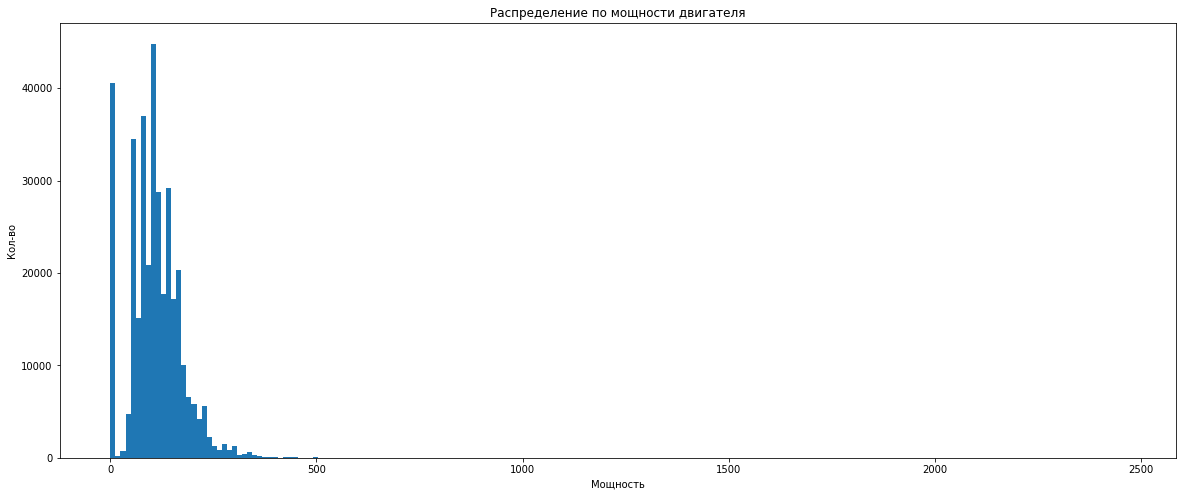

In [10]:
# построим гистограмму по мощности, чтобы посмотреть на выбросы
data[data['Power'] < 2500]['Power'].plot(kind='hist', bins=200, figsize=(20,8))
plt.title('Распределение по мощности двигателя')
plt.xlabel('Мощность')
plt.ylabel('Кол-во');

Все значения больше 500 можно считать выбросами. Есть также большое кол-во нулевых значений

Посчитаем кол-во выбросов и нулевых значений в данных

In [11]:
print('Количество нулевых значений по цене:', data[data['Price'] == 0]['Price'].count())
print('Количество нулевых значений по мощности:', data[data['Power'] == 0]['Power'].count())
print('Мощность более 500:', data[data['Power'] > 500]['Power'].count())
print('Год регистрации ранее 1950:', data[data['RegistrationYear'] < 1950]['RegistrationYear'].count())
print('Год регистрации позже 2022:', data[data['RegistrationYear'] > 2022]['RegistrationYear'].count())


Количество нулевых значений по цене: 10772
Количество нулевых значений по мощности: 40225
Мощность более 500: 459
Год регистрации ранее 1950: 246
Год регистрации позже 2022: 105


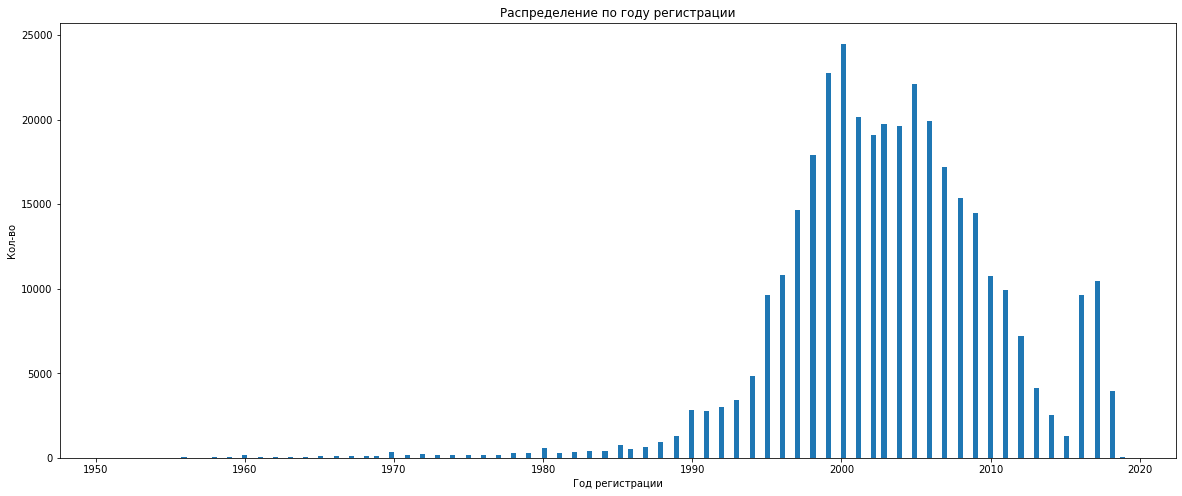

In [12]:
# построим гистограмму по мощности, чтобы посмотреть на выбросы
data[(data['RegistrationYear'] > 1950) & (data['RegistrationYear'] < 2022)]['RegistrationYear'].plot(kind='hist', bins=200, figsize=(20,8))
plt.title('Распределение по году регистрации')
plt.xlabel('Год регистрации')
plt.ylabel('Кол-во');


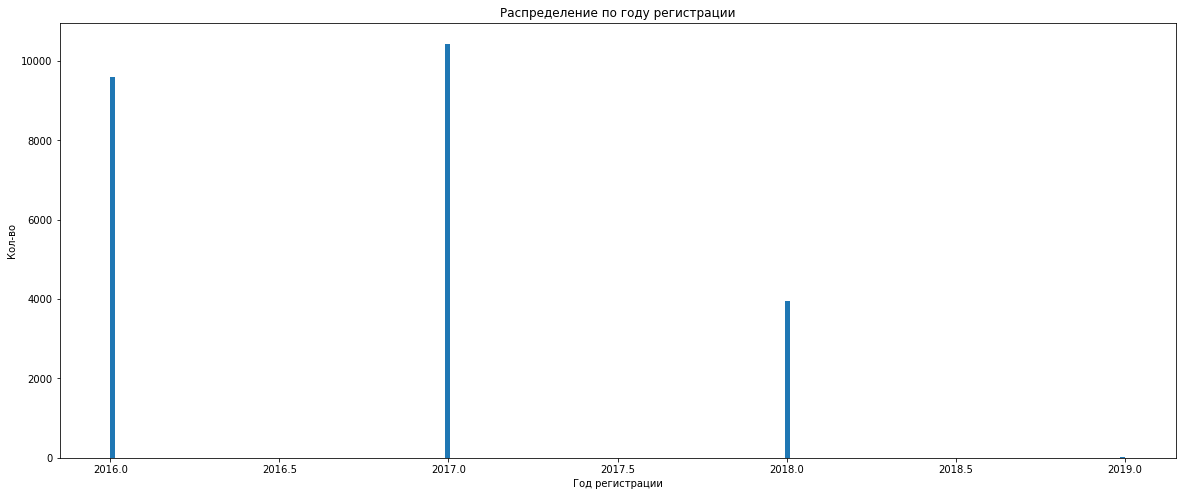

In [13]:
# построим гистограмму по мощности, чтобы посмотреть на выбросы
data[(data['RegistrationYear'] > 2015) & (data['RegistrationYear'] < 2022)]['RegistrationYear'].plot(kind='hist', bins=200, figsize=(20,8))
plt.title('Распределение по году регистрации')
plt.xlabel('Год регистрации')
plt.ylabel('Кол-во');

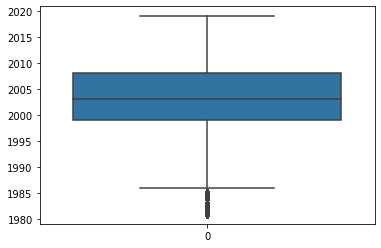

In [14]:
sns.boxplot(data=data[(data['RegistrationYear'] > 1980) & 
                      (data['RegistrationYear'] < 2022)]['RegistrationYear']);


удалим выбросы и строки с нулевыми значениями по цене

In [15]:
# удалим записи с нулевой ценой
data = data.loc[data['Price'] != 0]

In [16]:
# исключим записи с отсутствием модели
data = data.loc[~data['Model'].isna()]

In [17]:
# удалим выбросы по дате регистрации
data = data.query('RegistrationYear < 2016 and RegistrationYear >= 1950')

In [18]:
# заполним пропуски по наличию ремонта авто значением - unknown
data['NotRepaired'] = data['NotRepaired'].fillna('unknown')

In [19]:
# для мощности проведем следующую обработку пропусков и аномальных значений:
# для выбросов устанавливаем отсутствующие значения None
data.loc[(data['Power'] > 1000) | (data['Power'] <= 0), 'Power'] = None
# заполняем пропуски средним значением из соответствующих моделей авто
data['Power'] = data['Power'].fillna(data.groupby('Model')['Power'].transform('median'))
# исключаем пропущенные значения, где не удолось посчитать мощность
data = data.loc[~data['Power'].isna()]
# меняем тип данных на целочисленный
data['Power'] = data['Power'].astype('int64')

In [20]:
# создадим список из столбцов для дальнейшей обработки пропусков
list_col = ['VehicleType','Gearbox', 'FuelType']

In [21]:
# с помощью цикла заполним пропуски наиболее частыми значениями по идентичным моделям авто
for col in list_col:
    data[col] = data[col].fillna(data.groupby('Model')['VehicleType']
                            .transform(lambda x: x.value_counts().idxmax()))

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306291 entries, 0 to 354368
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Price             306291 non-null  int64 
 1   VehicleType       306291 non-null  object
 2   RegistrationYear  306291 non-null  int64 
 3   Gearbox           306291 non-null  object
 4   Power             306291 non-null  int64 
 5   Model             306291 non-null  object
 6   Kilometer         306291 non-null  int64 
 7   FuelType          306291 non-null  object
 8   Brand             306291 non-null  object
 9   NotRepaired       306291 non-null  object
dtypes: int64(4), object(6)
memory usage: 25.7+ MB


In [23]:
data.head(10)

Price  VehicleType  RegistrationYear Gearbox  Power    Model  Kilometer  \
0     480        sedan              1993  manual    101     golf     150000   
2    9800          suv              2004    auto    163    grand     125000   
3    1500        small              2001  manual     75     golf     150000   
4    3600        small              2008  manual     69    fabia      90000   
5     650        sedan              1995  manual    102      3er     150000   
6    2200  convertible              2004  manual    109  2_reihe     150000   
8   14500          bus              2014  manual    125    c_max      30000   
9     999        small              1998  manual    101     golf     150000   
10   2000        sedan              2004  manual    105  3_reihe     150000   
11   2799        wagon              2005  manual    140   passat     150000   

    FuelType       Brand NotRepaired  
0     petrol  volkswagen     unknown  
2   gasoline        jeep     unknown  
3     petrol  volkswagen          no  
4   gasoline       skoda          no  
5     petrol         bmw         yes  
6     petrol     peugeot          no  
8     petrol        ford     unknown  
9      sedan  volkswagen     unknown  
10    petrol       mazda          no  
11  gasoline  volkswagen         yes

**Выводы:**

в результате предобработки данных (с пропусками до 20%) удалось обработать и отсечь только 8% данных (включая 3% - объявления с нулевой ценой и 5% - объявления без указания модели авто, что непосредственно оказывает влияние на расчет цены), остальные выбросы и пропуски значений были обработаны без потери данных.

## Обучение моделей

### Кодирование данных

Данные подготовим методом OHE (прямой метод, который позволит все признаки сделать количественными), это позволит нам использовать модель линейной регрессии

In [24]:
data_ohe = pd.get_dummies(data, drop_first=True)
data_ohe.head()

Price  RegistrationYear  Power  Kilometer  VehicleType_convertible  \
0    480              1993    101     150000                        0   
2   9800              2004    163     125000                        0   
3   1500              2001     75     150000                        0   
4   3600              2008     69      90000                        0   
5    650              1995    102     150000                        0   

   VehicleType_coupe  VehicleType_other  VehicleType_sedan  VehicleType_small  \
0                  0                  0                  1                  0   
2                  0                  0                  0                  0   
3                  0                  0                  0                  1   
4                  0                  0                  0                  1   
5                  0                  0                  1                  0   

   VehicleType_suv  ...  Brand_skoda  Brand_smart  Brand_subaru  Brand_suzuki  \
0                0  ...            0            0             0             0   
2                1  ...            0            0             0             0   
3                0  ...            0            0             0             0   
4                0  ...            1            0             0             0   
5                0  ...            0            0             0             0   

   Brand_toyota  Brand_trabant  Brand_volkswagen  Brand_volvo  \
0             0              0                 1            0   
2             0              0                 0            0   
3             0              0                 1            0   
4             0              0                 0            0   
5             0              0                 0            0   

   NotRepaired_unknown  NotRepaired_yes  
0                    1                0  
2                    1                0  
3                    0                0  
4                    0                0  
5                    0                1  

[5 rows x 320 columns]

In [25]:
# посмотрим размер данных
data_ohe.shape

(306291, 320)

In [26]:
# выделим в отдельный лист категориальные признаки
categorical_list = ['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'NotRepaired']

In [27]:
# изменим тип данных с object на category
for col in categorical_list:
    data[col] = data[col].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306291 entries, 0 to 354368
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   Price             306291 non-null  int64   
 1   VehicleType       306291 non-null  category
 2   RegistrationYear  306291 non-null  int64   
 3   Gearbox           306291 non-null  category
 4   Power             306291 non-null  int64   
 5   Model             306291 non-null  category
 6   Kilometer         306291 non-null  int64   
 7   FuelType          306291 non-null  category
 8   Brand             306291 non-null  category
 9   NotRepaired       306291 non-null  category
dtypes: category(6), int64(4)
memory usage: 13.7 MB


**Вывод:** для возможности использования модели линейной регрессии применили метод Ohe, перекодировав категориальные признаки.

### Создание выборок

In [28]:
# создадим признаки для обучения модели линейной регрессии
features = data_ohe.drop(['Price'], axis = 1)
target = data_ohe['Price']

In [29]:
# разделим выборки на обучающую и тестовую для остальных моделей
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=.25, random_state=12345)


In [30]:
# масштабируем выборки
scaler = StandardScaler()
scaler.fit_transform(features_train)
features_train = scaler.transform(features_train)
features_test = scaler.transform(features_test)

По условию задания качество моделей будем определять метрикой RMSE. 
<br> Запишем функцию для расчета rmse.

In [31]:
def rmse (target, predictions):
    rmse =  mean_squared_error(target, predictions, squared= False)
    return rmse

**Вывод:** выборки подготовлены для обучения моделей

### Обучение моделей

#### Константная модель

In [32]:
constant_model = DummyRegressor(strategy='mean')
constant_model.fit(features_train,target_train)
constant_pred = constant_model.predict(features_test)
print('RMSE для константной модели:', rmse(target_test,constant_pred).round(2))

RMSE для константной модели: 4576.33


#### LinearRegression

In [33]:
model_lr = LinearRegression()

In [34]:
%%time
model_lr.fit(features_train, target_train)

CPU times: user 18.3 s, sys: 7.6 s, total: 25.9 s
Wall time: 27.3 s


LinearRegression()

In [35]:
%%time
predicted_lr = pd.Series(model_lr.predict(features_test))

CPU times: user 55.5 ms, sys: 39 ms, total: 94.5 ms
Wall time: 95.3 ms


In [36]:
print('RMSE - LinearRegression:', rmse(target_test, predicted_lr).round(2))

RMSE - LinearRegression: 2575.45


#### CatBoostRegressor

In [37]:
model_cbr = CatBoostRegressor(loss_function='RMSE', 
                              iterations=100, 
                              learning_rate=0.2, 
                              thread_count=-1, 
                              random_state=18, 
                              max_depth=10, 
                              l2_leaf_reg=3.5
                              )

In [38]:
%%time
model_cbr.fit(features_train, target_train)

0:	learn: 3919.6731600	total: 119ms	remaining: 11.8s
1:	learn: 3414.1948761	total: 184ms	remaining: 9.02s
2:	learn: 3035.8938979	total: 245ms	remaining: 7.92s
3:	learn: 2748.2977129	total: 306ms	remaining: 7.34s
4:	learn: 2538.5595134	total: 371ms	remaining: 7.04s
5:	learn: 2374.9484760	total: 434ms	remaining: 6.79s
6:	learn: 2239.5396233	total: 497ms	remaining: 6.6s
7:	learn: 2147.7151994	total: 561ms	remaining: 6.45s
8:	learn: 2070.2587662	total: 622ms	remaining: 6.29s
9:	learn: 2016.0361680	total: 687ms	remaining: 6.18s
10:	learn: 1970.4773898	total: 750ms	remaining: 6.07s
11:	learn: 1929.1597056	total: 814ms	remaining: 5.96s
12:	learn: 1900.1048477	total: 880ms	remaining: 5.89s
13:	learn: 1875.5751597	total: 944ms	remaining: 5.8s
14:	learn: 1856.7066443	total: 1.01s	remaining: 5.71s
15:	learn: 1840.2218563	total: 1.07s	remaining: 5.64s
16:	learn: 1825.8393179	total: 1.15s	remaining: 5.61s
17:	learn: 1813.5227566	total: 1.21s	remaining: 5.53s
18:	learn: 1800.4882925	total: 1.28s	rem

In [39]:
%%time
predict_cbr = model_cbr.predict(features_test, verbose = 2)

CPU times: user 63.6 ms, sys: 0 ns, total: 63.6 ms
Wall time: 61.9 ms


In [40]:
print('RMSE - CatBoostRegressor:', rmse(target_test, predict_cbr).round(2))

RMSE - CatBoostRegressor: 1628.31


#### LightGBM

In [41]:
parameters = {'boosting_type': 'gbdt', 
              'max_depth': 7,
              'n_estimators': 100, 
              'learning_rate': 0.2,
              'random_state': 12345}

In [42]:
model_lgbm = LGBMRegressor(**parameters)

In [43]:
%%time
model_lgbm.fit(features_train, target_train)

CPU times: user 16.8 s, sys: 408 ms, total: 17.2 s
Wall time: 17.3 s


LGBMRegressor(learning_rate=0.2, max_depth=7, random_state=12345)

In [44]:
%%time
predict_lgbm = model_lgbm.predict(features_test, verbose = 2)

CPU times: user 716 ms, sys: 49.8 ms, total: 766 ms
Wall time: 711 ms


In [45]:
print('RMSE - LGBMRegressor:', rmse(target_test, predict_lgbm).round(2))

RMSE - LGBMRegressor: 1645.18


#### DecisionTreeRegressor

In [46]:
for depth in range(5, 30, 5):
    model = DecisionTreeRegressor(max_depth=depth, splitter='best', random_state=12345, min_samples_split=2)
    mse = cross_val_score(model, features_train, target_train, cv=3, scoring='neg_mean_squared_error')
    print("RMSE при depth =", depth, ":", (-mse.mean()) ** 0.5)


RMSE при depth = 5 : 2344.813399766717
RMSE при depth = 10 : 1986.7162650268956
RMSE при depth = 15 : 1882.5260439414199
RMSE при depth = 20 : 1891.4496113729388
RMSE при depth = 25 : 1914.3189107263088


In [47]:
parameters = {'max_depth': 15,
              'random_state': 12345}

In [48]:
DTR_model = DecisionTreeRegressor(**parameters)

In [49]:
%%time
DTR_model.fit(features_train, target_train)

CPU times: user 5.33 s, sys: 62.9 ms, total: 5.4 s
Wall time: 5.4 s


DecisionTreeRegressor(max_depth=15, random_state=12345)

In [50]:
%%time
predict_DTR = DTR_model.predict(features_test)

CPU times: user 50.1 ms, sys: 28.7 ms, total: 78.8 ms
Wall time: 81.7 ms


In [51]:
print('RMSE - DecisionTreeRegressor:', rmse(target_test, predict_DTR).round(2))

RMSE - DecisionTreeRegressor: 1838.51


## Анализ моделей

Сравним расчеты по каждой модели

In [53]:
models = [['LR', 27, 95, 2575], 
          ['CBR', 9, 62, 1628],
          ['LGB', 17, 711, 1645],
          ['DTR', 5, 82, 1839]] 
    
df = pd.DataFrame(models, columns =['model', 'train_time, sec', 'predict_time, msec', 'rmse']) 
df 


model  train_time, sec  predict_time, msec  rmse
0    LR               27                  95  2575
1   CBR                9                  62  1628
2   LGB               17                 711  1645
3   DTR                5                  82  1839

**Вывод:**
Глядя на результаты, можно сказать, что градиентный бустинг показывает лучше результаты, чем линейные модели. 
Лучшая модель - CatBoostRegressor и по метрике RMSE и по скорости обучения и предсказания.

## Вывод

**Общие выводы по проекту:**

В ходе проекта было сделано:
1. проведен анализ данных с выявлением аномалий, пропусков, которые в последствии были отработаны. 8% данных пришлось отбросить в связи с отсутствием информации по цене, либо модели авто.
2. Данные были подготовлены для обучения моделей (категориальные признаки были закодированы, созданы обучающая и тестовая выборки в отношении 75% и 25%)
3. Для обучения были выбраны 4 модели: `LinearRegression`, `CatBoostRegressor`, `LightGBM` и `DecisionTreeRegressor`, в которых были выставлены гиперпараметры с целью получения наилучшей метрики RMSE
4. Все модели получили RMSE лучше в сравнении с константной моделью, у которой RMSE = 4576
5. По сравнению результатов моделей можно сказать, что время предсказания любой модели значительно меньше, чем её обучение. К минимизации времени предсказания нужно стремиться, т.к. модель обучается 1 раз, а предсказывать она может множество раз не переобучиваясь.
6. Лушие показатели дала модель `CatBoostRegressor` со значением RMSE = 1628 (что значительно лучше константной модели), ее и рекомендуется выбрать для предсказания цен авто.